<a href="https://colab.research.google.com/github/entenam/TF-Intro/blob/main/SLDMultiClassfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**IMPORTANT NOTE:** This notebook is designed to run as a Colab. Click the button on top that says, `Open in Colab`, to run this notebook as a Colab. Running the notebook on your local machine might result in some of the code blocks throwing errors.

In [21]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [22]:
# sign_mnist_train.csv
!gdown --id 1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR -O '/content/drive/MyDrive/AI Basics with Tensorflow/SLDMultiClass/sign_mnist_train.csv'
# sign_mnist_test.csv
!gdown --id 1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg -O '/content/drive/MyDrive/AI Basics with Tensorflow/SLDMultiClass/sign_mnist_test.csv'

def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      ### START CODE HERE
      reader = csv.reader(training_file, delimiter = ',')
      index = 0
      tmpImages = []
      tmpLabels = []
      for row in reader:
        if index!= 0:
          tmpLabels.append(row[0])
          image_data = row[1:785]
          image_data_array = np.array_split(image_data, 28)
          tmpImages.append(image_data_array)
        index+=1
      labels = np.array(tmpLabels).astype('float')
      images = np.array(tmpImages).astype('float')
      ### END CODE HERE
    return images, labels

#training_labels = get_data('./sign_mnist_train.csv')
training_images, training_labels = get_data('./sign_mnist_train.csv')
testing_images, testing_labels = get_data('./sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

Downloading...
From: https://drive.google.com/uc?id=1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
To: /content/drive/MyDrive/AI Basics with Tensorflow/SLDMultiClass/sign_mnist_train.csv
100% 83.3M/83.3M [00:00<00:00, 102MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg
To: /content/drive/MyDrive/AI Basics with Tensorflow/SLDMultiClass/sign_mnist_test.csv
100% 21.8M/21.8M [00:00<00:00, 99.3MB/s]
(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [23]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis = 3) ### YOUR CODE HERE
testing_images = np.expand_dims(testing_images, axis = 3) ### YOUR CODE HERE

train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    shear_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    zoom_range = 0.2,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(
    ### YOUR CODE HERE
    rescale = 1.0/255.0
    )

# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [31]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    ### START CODE HERE
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3,), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),                                
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
    
    ### END CODE HERE
])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [32]:
# Train the Model
history = model.fit(train_datagen.flow(
    training_images, training_labels, batch_size=32),
    steps_per_epoch = len(training_images)/32,
    epochs = 15,
    validation_data = validation_datagen.flow(testing_images,
                        testing_labels, batch_size=32),
                        validation_steps = len(testing_images)/32)

model.save("/content/drive/MyDrive/AI Basics with Tensorflow/SLDMultiClass/SL.h5")

model.evaluate(testing_images, testing_labels)

# The output from model.evaluate should be close to:
# [6.92426086682151, 0.56609035]

Epoch 1/15
857/857 [==============================] - 61s 70ms/step - loss: 2.7836 - accuracy: 0.1628 - val_loss: 2.0487 - val_accuracy: 0.2907
Epoch 2/15
857/857 [==============================] - 57s 67ms/step - loss: 2.1028 - accuracy: 0.3446 - val_loss: 1.4848 - val_accuracy: 0.4881
Epoch 3/15
857/857 [==============================] - 59s 68ms/step - loss: 1.6741 - accuracy: 0.4714 - val_loss: 0.8762 - val_accuracy: 0.7294
Epoch 4/15
857/857 [==============================] - 59s 69ms/step - loss: 1.3653 - accuracy: 0.5594 - val_loss: 0.7351 - val_accuracy: 0.7552
Epoch 5/15
857/857 [==============================] - 58s 67ms/step - loss: 1.1731 - accuracy: 0.6200 - val_loss: 0.5562 - val_accuracy: 0.8182
Epoch 6/15
857/857 [==============================] - 57s 66ms/step - loss: 1.0294 - accuracy: 0.6601 - val_loss: 0.5866 - val_accuracy: 0.7722
Epoch 7/15
857/857 [==============================] - 57s 66ms/step - loss: 0.9143 - accuracy: 0.7027 - val_loss: 0.4679 - val_accuracy:

[178.6334686279297, 0.7419130206108093]

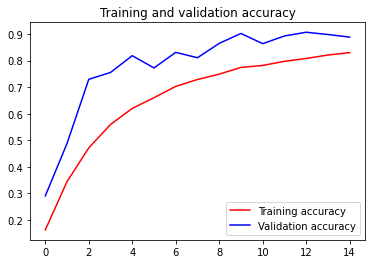

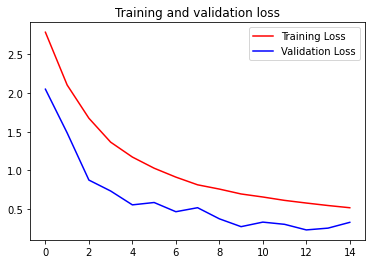

In [36]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy']### YOUR CODE HERE
val_acc = history.history['val_accuracy']### YOUR CODE HERE
loss = history.history['loss']### YOUR CODE HERE
val_loss = history.history['val_loss']### YOUR CODE HERE

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()